In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf


#티스토리 업로드시 최적화 코드
#from IPython.core.display import display, HTML
#display(HTML("<style>.container {width:90% !important;}</style>"))

# 2023.04.17
# TRAINING
Dataset Info.

train.csv [파일]

    ID : 샘플 고유 ID
    User-ID : 유저 고유 ID
    Book-ID : 도서 고유 ID
    유저 정보
    Age : 나이
    Location : 지역
    도서 정보
    Book-Title : 도서 명
    Book-Author : 도서 저자
    Year-Of-Publication : 도서 출판 년도 (-1일 경우 결측 혹은 알 수 없음)
    Publisher : 출판사
    Book-Rating : 유저가 도서에 부여한 평점 (0점 ~ 10점)


test.csv [파일]

    ID : 샘플 고유 ID
    User-ID : 유저 고유 ID
    Book-ID : 도서 고유 ID
    유저 정보
    Age : 나이
    Location : 지역
    도서 정보
    Book-Title : 도서 명
    Book-Author : 도서 저자
    Year-Of-Publication : 도서 출판 년도 (-1일 경우 결측 혹은 알 수 없음)
    Publisher : 출판사


sample_submission.csv [제출양식]

    ID : 샘플 고유 ID
    Book-Rating : 예측한 유저가 도서에 부여할 평점

In [1]:
import pandas as pd

In [2]:
import numpy as np
import random
import os
import gc

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv( 'test.csv')
sample_submission = pd.read_csv('sample_submission.csv', index_col = 0)

In [5]:
train['City'] = [(i.split(',')[0]).lstrip().title() for i in train['Location']]
train['State'] = [(i.split(',')[1]).lstrip().title() for i in train['Location']]
train['Country'] = [(i.split(',')[2]).lstrip().title() for i in train['Location']]

In [6]:
test['City'] = [(i.split(',')[0]).lstrip().title() for i in test['Location']]
test['State'] = [(i.split(',')[1]).lstrip().title() for i in test['Location']]
test['Country'] = [(i.split(',')[2]).lstrip().title() for i in test['Location']]

In [7]:
# https://gist.github.com/nealrs/96342d8231b75cf4bb82
contractions = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}


In [8]:
from stop_words import get_stop_words
# 불용어 리스트
languages = [
   'Arabic',
   'Bulgarian',
   'Catalan',
   'Czech',
   'Danish',
   'Dutch',
   'English',
   'Finnish',
   'French',
   'German',
   'Hungarian',
   'Indonesian',
   'Italian',
   'Norwegian',
   'Polish',
   'Portuguese',
   'Romanian',
   'Russian',
   'Spanish',
   'Swedish',
   'Turkish',
   'Ukrainian'
]
my_stop_word_list = []
for i in languages:
    my_stop_word_list.append(get_stop_words(i.lower()))
my_stop_word_list = sum(my_stop_word_list, [])
my_stop_word_list = my_stop_word_list + ['paperbook', 'hardcover']

In [9]:
from bs4 import BeautifulSoup
import re

def preprocessing_location(sentence, remove_stopwords = True):
    #소문자화
    sentence = sentence.lower()
    #괄호로 닫친 문자열 괄호 제거
    sentence = re.sub(r'\([^)]*\)',' ',sentence)
    #쌍따옴표 제거
    sentence = re.sub('"', ' ', sentence) 
    #소유격 제거
    sentence = re.sub(r"'s\b"," ",sentence)
    #특수문자 제거
    sentence = re.sub("[^a-zA-Z]"," ", sentence)
    
    #불용어 제거
    if my_stop_word_list:
        tokens = ' '.join(word for word in sentence.split() if not word in my_stop_word_list if len(word)>1)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word)>1)
    return tokens

#main 단어만 추출 > 차후 이 단어들로 BERTopic 테마 만들 것
def preprocessing_sentence(sentence, remove_stopwords = True):
    #소문자화
    sentence = sentence.lower()
    #html 태그 제거
    sentence = BeautifulSoup(sentence, "lxml").text
    #괄호로 닫친 문자열 괄호 제거
    sentence = re.sub(r'\([^)]*\)',' ',sentence)
    #쌍따옴표 제거
    sentence = re.sub('"', ' ', sentence) 
    #약어 정규화
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")])
    #소유격 제거
    sentence = re.sub(r"'s\b"," ",sentence)
    #특수문자 제거
    sentence = re.sub("[^a-zA-Z]"," ", sentence)
    
    #불용어 제거
    if my_stop_word_list:
        tokens = ' '.join(word for word in sentence.split() if not word in my_stop_word_list if len(word)>1)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word)>1)
    return tokens



In [10]:
# preprocessing Location Data
train_pp = train[['ID', 'User-ID','City', 'State','Country']]

In [11]:
train_pp['City_st'] = train_pp['City'].apply(preprocessing_location)
train_pp['State_st'] = train_pp['State'].apply(preprocessing_location)
train_pp['Country_st'] = train_pp['Country'].apply(preprocessing_location)

/tmp/ipykernel_8830/3292312293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pp['City_st'] = train_pp['City'].apply(preprocessing_location)
/tmp/ipykernel_8830/3292312293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pp['State_st'] = train_pp['State'].apply(preprocessing_location)
/tmp/ipykernel_8830/3292312293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [12]:
train_pp = train_pp[(train_pp['City_st'].astype(str) != '') & (train_pp['City_st'].astype(str) != 'N/A') & (train_pp['State_st'].astype(str) != '') & (train_pp['State_st'].astype(str) != 'N/A')]

In [13]:
country_ct = train_pp.groupby(['State_st','Country_st'])['Country_st'].count().sort_values().groupby(level=0).tail(1)
country_ct = pd.DataFrame(country_ct)

In [14]:
country_ct = country_ct.rename(columns={'Country_st':'count'})
country_ct = country_ct.reset_index()

In [15]:
country_ct

,State_st,Country_st,count
0,kogi state,nigeria,1
1,warminsko mazurskie,poland,1
2,warwick,bermuda,1
3,illes baleares,spain,1
4,illlinois,usa,1
...,...,...,...
1584,florida,usa,28219
1585,missouri,usa,28227
1586,ontario,canada,34491
1587,texas,usa,36657


In [16]:
train.groupby(['City','State','Country','User-ID'])['User-ID'].count().sort_values()

City              State           Country  User-ID   
                                           USER_03667        1
Murfreesboro      Tennessee       Usa      USER_86697        1
Murillo El Fruto  Navarra         Spain    USER_03068        1
Murphy            North Carolina  Usa      USER_85323        1
                  Texas           Usa      USER_59330        1
                                                         ...  
Morrow            Georgia         Usa      USER_03411     3453
La Ronge          Saskatchewan    Canada   USER_73501     4290
Ft. Stewart       Georgia         Usa      USER_52453     5814
Little Canada     Minnesota       Usa      USER_54845     6456
N/A               N/A             N/A      USER_56601    11143
Name: User-ID, Length: 83256, dtype: int64

In [17]:
new_country = country_ct[country_ct['count'] >= 10]
new_country.columns = ['State_st', 'N_Country', 'count']

In [18]:
train_N = pd.merge(train_pp, new_country[['State_st', 'N_Country']], on = 'State_st', how = 'left')
train_N['N_Country'] = np.where(train_N['N_Country'] == '', train_N['Country_st'], train_N['N_Country'])

train_N[train_N['N_Country'] == ''][['City_st', 'State_st']].drop_duplicates()

,City_st,State_st
102715,ray,michigan usa
270481,bray,wicklow
358783,bucharest,ilfov
562006,pepinster,liege
644189,amora,estremadura
751534,huntly,aberdeenshire
798786,superior,wi


In [19]:
# train에 있는 정보로 County 바꾸기
train_N.loc[train_N['State_st'] == 'michigan usa', 'N_Country'] = 'usa'
train_N.loc[train_N['State_st'] == 'wicklow', 'N_Country'] = 'ireland'
train_N.loc[train_N['State_st'] == 'ilfov', 'N_Country'] = ''
train_N.loc[train_N['State_st'] == 'liege', 'N_Country'] = 'belgium'
train_N.loc[train_N['State_st'] == 'estremadura', 'N_Country'] = 'portugal'
train_N.loc[train_N['State_st'] == 'aberdeenshire', 'N_Country'] = 'united kingdom'
train_N.loc[train_N['State_st'] == 'wi', 'N_Country'] = 'wisconsin'

In [20]:
def preprocessing_data(df):
    # Decompose Location by split
    df['City'] = [(i.split(',')[0]).lstrip().title() for i in df['Location']]
    df['State'] = [(i.split(',')[1]).lstrip().title() for i in df['Location']]
    df['Country'] = [(i.split(',')[2]).lstrip().title() for i in df['Location']]
    
    # NaN, N/A, etc.. Delete and Change
    # Only using Train Data
    df_pp = train.copy()[['ID', 'User-ID','City', 'State','Country']]
    
    # test preprocessing
    df['City_st'] = df['City'].apply(preprocessing_location)
    df['State_st'] = df['State'].apply(preprocessing_location)
    df['Country_st'] = df['Country'].apply(preprocessing_location)
    
    df_pp['City_st'] = df_pp['City'].apply(preprocessing_location)
    df_pp['State_st'] = df_pp['State'].apply(preprocessing_location)
    df_pp['Country_st'] = df_pp['Country'].apply(preprocessing_location)

    df_pp = df_pp[(df_pp['City_st'].astype(str) != '') & (df_pp['City_st'].astype(str) != 'N/A') & (df_pp['State_st'].astype(str) != '') & (df_pp['State_st'].astype(str) != 'N/A')]
    
    country_ct = df_pp.groupby(['State_st','Country_st'],as_index=True)['Country_st'].count().sort_values().groupby(level=0).tail(1)
    country_ct = pd.DataFrame(country_ct)
    country_ct = country_ct.rename(columns={'Country_st':'count'})
    country_ct = country_ct.reset_index()
    new_country = country_ct[country_ct['count'] >= 10]
    new_country.columns = ['State_st', 'N_Country', 'count']
    
    df_N = pd.merge(df, new_country[['State_st', 'N_Country']], on = 'State_st', how = 'left')
    
    df_N['N_Country'] = np.where((df_N['N_Country'] == '')|(df_N['N_Country'].astype(str) == 'nan'), 
                                 np.where((df_N['Country_st'] == '')|(df_N['Country_st'].astype(str) == 'nan'), 'UnKnown', df_N['Country_st']), df_N['N_Country'])
    

    # train에 있는 정보로 County 바꾸기
    df_N.loc[df_N['State_st'] == 'michigan usa', 'N_Country'] = 'usa'
    df_N.loc[df_N['State_st'] == 'wicklow', 'N_Country'] = 'ireland'
    df_N.loc[df_N['State_st'] == 'ilfov', 'N_Country'] = ''
    df_N.loc[df_N['State_st'] == 'liege', 'N_Country'] = 'belgium'
    df_N.loc[df_N['State_st'] == 'estremadura', 'N_Country'] = 'portugal'
    df_N.loc[df_N['State_st'] == 'aberdeenshire', 'N_Country'] = 'united kingdom'
    df_N.loc[df_N['State_st'] == 'wi', 'N_Country'] = 'wisconsin'
    
    return df_N
    

In [21]:
N_train = preprocessing_data(train)
N_test = preprocessing_data(test)
N_train

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,City,State,Country,City_st,State_st,Country_st,N_Country
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira,Sackville,New Brunswick,Canada,sackville,new brunswick,canada,canada
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books,Sackville,New Brunswick,Canada,sackville,new brunswick,canada,canada
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books,Sackville,New Brunswick,Canada,sackville,new brunswick,canada,canada
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon,Sackville,New Brunswick,Canada,sackville,new brunswick,canada,canada
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book,Sackville,New Brunswick,Canada,sackville,new brunswick,canada,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,USER_92096,BOOK_081138,0,34.0,"minneapolis, minnesota, usa",Healing Words: The Power of Prayer and the Pra...,Larry Dossey,1993.0,Harpercollins,Minneapolis,Minnesota,Usa,minneapolis,minnesota,usa,usa
871389,TRAIN_871389,USER_92097,BOOK_258124,0,35.0,"temple, texas, usa",The Salmon of Doubt: Hitchhiking the Galaxy On...,DOUGLAS ADAMS,2002.0,Harmony,Temple,Texas,Usa,temple,texas,usa,usa
871390,TRAIN_871390,USER_92098,BOOK_071848,0,45.0,"ottawa, ontario, canada",Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2000.0,Thorndike Press,Ottawa,Ontario,Canada,ottawa,ontario,canada,canada
871391,TRAIN_871391,USER_92099,BOOK_252599,8,43.0,"maple grove, minnesota, usa",Heartbreak Hill: Anatomy of a Ryder Cup,Tim Rosaforte,1996.0,St Martins Pr,Maple Grove,Minnesota,Usa,maple grove,minnesota,usa,usa


In [ ]:
!pip install catboost

In [22]:
# 나이 그룹화
labels = ['0-3','3-6','6-8','8-12','12-18','18-25','25-34','35-44','45-54','55-64','65-74','75+']
bins = [0, 3, 6, 8, 12, 18, 25, 34, 44, 54, 64, 74, 250]
N_train['Age_gb'] = pd.cut(N_train.Age, bins, labels = labels,include_lowest = True)
#train['Age_gb'] = pd.cut(train.Age, bins, labels = labels,include_lowest = True)

In [23]:
N_test['Age_gb'] = pd.cut(N_test.Age, bins, labels = labels,include_lowest = True)
#test['Age_gb'] = pd.cut(test.Age, bins, labels = labels,include_lowest = True)

In [24]:
def feature_engineering(df):
    labels = ['0-3','3-6','6-8','8-12','12-18','18-25','25-34','35-44','45-54','55-64','65-74','75+']
    bins = [0, 3, 6, 8, 12, 18, 25, 34, 44, 54, 64, 74, 250]
    df['Age_gb'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)
    df = df.join(
                df.groupby('N_Country')['Age'].aggregate(['median',  'mean']), #'mean', pd.Series.mode
                on='N_Country'
                )
    return df

In [25]:
train_lb = feature_engineering(N_train)
test_lb = feature_engineering(N_test)

In [26]:
from sklearn.preprocessing import OrdinalEncoder

N_FEATURES = ['ID', 'User-ID', 'Book-Rating', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'City','State_st','N_Country']
N_FEATURES_T = ['ID', 'User-ID', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'City','State','N_Country','Age_gb']
#FEATURE = ['User-ID', 'Book-Title','Book-Author','Publisher', 'City','State','Country','Age_gb']#,'Topic_num']

train_lb = N_train.__deepcopy__() 
test_lb = N_test.__deepcopy__()

train_lb = feature_engineering(train_lb)
test_lb = feature_engineering(test_lb)

#train_lb = pd.merge(train_lb, title, on = 'Book-Title_st', how = 'left')
#test_lb = pd.merge(test_lb, title_t, on = 'Book-Title_st', how = 'left')

train_lb = train_lb.drop(columns = ['Book-ID', 'Location', 'City_st','State_st','Country', 'Country_st'])
test_lb = test_lb.drop(columns = ['Book-ID', 'Location', 'City_st','State_st','Country', 'Country_st'])

train_lb[N_FEATURES_T] = train_lb[N_FEATURES_T].astype(str) 
test_lb[N_FEATURES_T] = test_lb[N_FEATURES_T].astype(str)

for i in N_FEATURES_T:
    # train에는 없고, test에는 있는 원소는 -2 처리
    oe = OrdinalEncoder(handle_unknown='use_encoded_value',
                         unknown_value=-2)
    oe=oe.fit(train_lb[i].to_numpy().reshape(-1, 1))
    train_lb[i] = oe.transform(train_lb[i].to_numpy().reshape(-1, 1))
    test_lb[i] = oe.transform(test_lb[i].to_numpy().reshape(-1, 1))

In [27]:
X_train = train_lb.drop(columns = ['ID','Book-Rating'])#,'Book-Title_st','City_st','State_st','Country_st'])
y_train = train_lb['Book-Rating']
x_test = test_lb.drop(columns = ['ID'])#,'Book-Title_st','City_st','State_st','Country_st'])

<Figure size 400x400 with 0 Axes>

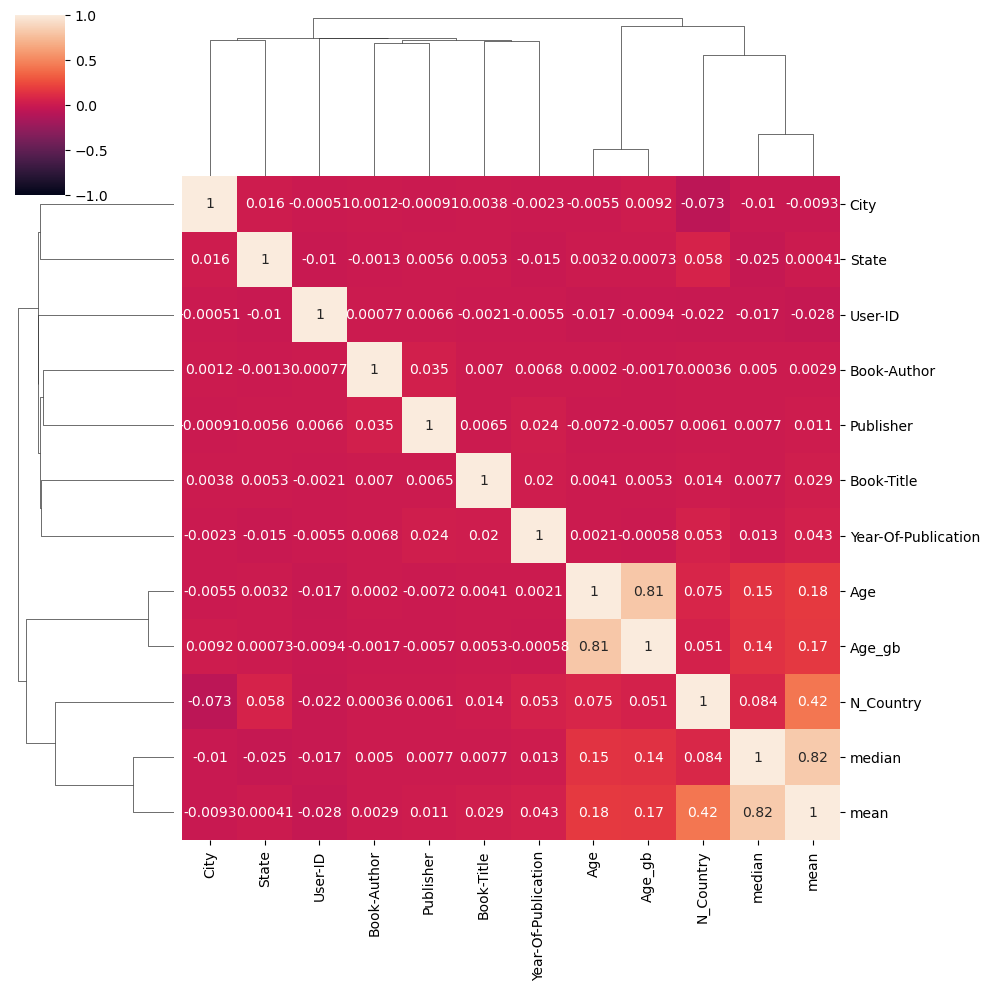

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize = (4, 4))
clustermap = sns.clustermap(X_train.corr(), vmin = -1, vmax = 1, annot = True)

In [29]:
from catboost import CatBoostRegressor 

model = CatBoostRegressor(random_seed = 113,
                          l2_leaf_reg = 0.003426034644149707,
                          max_bin = 358,
                          subsample = 0.9974697184313627,
                          learning_rate = 0.009464402227606937,
                          max_depth = 11,
                          min_data_in_leaf = 139,
                          eval_metric = 'RMSE',
                          iterations = 8694,
                          task_type='GPU',
                          bootstrap_type = 'Poisson',
                          early_stopping_rounds = 100,
                          verbose=500
                          )

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  0
0:	learn: 3.8400309	test: 3.8395843	best: 3.8395843 (0)	total: 81.4ms	remaining: 11m 47s
500:	learn: 3.3158857	test: 3.2877944	best: 3.2877944 (500)	total: 45.8s	remaining: 12m 29s
1000:	learn: 3.2738001	test: 3.2685156	best: 3.2685156 (1000)	total: 1m 31s	remaining: 11m 43s
1500:	learn: 3.2441411	test: 3.2607357	best: 3.2607316 (1499)	total: 2m 18s	remaining: 11m 4s
2000:	learn: 3.2185172	test: 3.2563968	best: 3.2563968 (2000)	total: 3m 5s	remaining: 10m 22s
2500:	learn: 3.1945752	test: 3.2533073	best: 3.2533073 (2500)	total: 3m 53s	remaining: 9m 38s
3000:	learn: 3.1720000	test: 3.2512383	best: 3.2512324 (2999)	total: 4m 41s	remaining: 8m 54s
3500:	learn: 3.1505368	test: 3.2499591	best: 3.2499524 (3498)	total: 5m 29s	remaining: 8m 9s
4000:	learn: 3.1300341	test: 3.2489921	best: 3.2489867 (3995)	total: 6m 17s	remaining: 7m 23s
4500:	learn: 3.1100555	test: 3.2480591	best: 3.2480440 (4465)	total: 7m 5s	remaining: 6m 36s
5000:	learn: 3.0897867	test: 3.2473552	best: 3.2473314 (495

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  1
0:	learn: 3.8400156	test: 3.8396407	best: 3.8396407 (0)	total: 78.3ms	remaining: 11m 20s
500:	learn: 3.3160919	test: 3.2777775	best: 3.2777775 (500)	total: 44.8s	remaining: 12m 13s
1000:	learn: 3.2742958	test: 3.2579168	best: 3.2579168 (1000)	total: 1m 30s	remaining: 11m 34s
1500:	learn: 3.2444459	test: 3.2501430	best: 3.2501430 (1500)	total: 2m 16s	remaining: 10m 55s
2000:	learn: 3.2181218	test: 3.2456230	best: 3.2456161 (1999)	total: 3m 3s	remaining: 10m 14s
2500:	learn: 3.1943901	test: 3.2426515	best: 3.2426483 (2499)	total: 3m 51s	remaining: 9m 33s
3000:	learn: 3.1711858	test: 3.2402961	best: 3.2402961 (3000)	total: 4m 39s	remaining: 8m 49s
3500:	learn: 3.1492305	test: 3.2387449	best: 3.2387376 (3499)	total: 5m 26s	remaining: 8m 4s
4000:	learn: 3.1279270	test: 3.2377101	best: 3.2377059 (3999)	total: 6m 14s	remaining: 7m 19s
4500:	learn: 3.1079233	test: 3.2369738	best: 3.2369691 (4497)	total: 7m 1s	remaining: 6m 32s
5000:	learn: 3.0879308	test: 3.2363962	best: 3.2363896 (49

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  2
0:	learn: 3.8400364	test: 3.8394675	best: 3.8394675 (0)	total: 65ms	remaining: 9m 25s
500:	learn: 3.3177530	test: 3.2694692	best: 3.2694692 (500)	total: 45.2s	remaining: 12m 18s
1000:	learn: 3.2749745	test: 3.2483687	best: 3.2483687 (1000)	total: 1m 30s	remaining: 11m 38s
1500:	learn: 3.2444218	test: 3.2396951	best: 3.2396951 (1500)	total: 2m 17s	remaining: 10m 59s
2000:	learn: 3.2175503	test: 3.2350445	best: 3.2350392 (1997)	total: 3m 4s	remaining: 10m 18s
2500:	learn: 3.1927186	test: 3.2321346	best: 3.2321346 (2500)	total: 3m 52s	remaining: 9m 36s
3000:	learn: 3.1694199	test: 3.2300324	best: 3.2300308 (2997)	total: 4m 40s	remaining: 8m 51s
3500:	learn: 3.1473345	test: 3.2286231	best: 3.2286119 (3498)	total: 5m 28s	remaining: 8m 6s
4000:	learn: 3.1260440	test: 3.2275420	best: 3.2275420 (4000)	total: 6m 16s	remaining: 7m 21s
4500:	learn: 3.1058087	test: 3.2268592	best: 3.2268592 (4500)	total: 7m 3s	remaining: 6m 34s
5000:	learn: 3.0866210	test: 3.2262465	best: 3.2262399 (4996)

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  3
0:	learn: 3.8400464	test: 3.8395181	best: 3.8395181 (0)	total: 67.5ms	remaining: 9m 46s
500:	learn: 3.3151783	test: 3.2747089	best: 3.2747089 (500)	total: 45.1s	remaining: 12m 17s
1000:	learn: 3.2733997	test: 3.2568029	best: 3.2568029 (1000)	total: 1m 31s	remaining: 11m 41s
1500:	learn: 3.2428342	test: 3.2499331	best: 3.2499331 (1500)	total: 2m 17s	remaining: 11m
2000:	learn: 3.2159764	test: 3.2462378	best: 3.2462378 (2000)	total: 3m 5s	remaining: 10m 19s
2500:	learn: 3.1915057	test: 3.2435691	best: 3.2435614 (2497)	total: 3m 52s	remaining: 9m 36s
3000:	learn: 3.1684913	test: 3.2417667	best: 3.2417600 (2999)	total: 4m 40s	remaining: 8m 52s
3500:	learn: 3.1463217	test: 3.2405668	best: 3.2405634 (3499)	total: 5m 28s	remaining: 8m 7s
4000:	learn: 3.1247525	test: 3.2393277	best: 3.2393277 (4000)	total: 6m 16s	remaining: 7m 21s
4500:	learn: 3.1043914	test: 3.2384588	best: 3.2384566 (4499)	total: 7m 4s	remaining: 6m 35s
5000:	learn: 3.0848769	test: 3.2379481	best: 3.2379406 (4994)	t

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  4
0:	learn: 3.8400828	test: 3.8396072	best: 3.8396072 (0)	total: 66.4ms	remaining: 9m 36s
500:	learn: 3.3158682	test: 3.2846186	best: 3.2846186 (500)	total: 45.6s	remaining: 12m 25s
1000:	learn: 3.2735934	test: 3.2657097	best: 3.2657097 (1000)	total: 1m 32s	remaining: 11m 50s
1500:	learn: 3.2429981	test: 3.2580367	best: 3.2580367 (1500)	total: 2m 18s	remaining: 11m 5s
2000:	learn: 3.2160916	test: 3.2537892	best: 3.2537892 (2000)	total: 3m 5s	remaining: 10m 21s
2500:	learn: 3.1922606	test: 3.2510892	best: 3.2510878 (2498)	total: 3m 54s	remaining: 9m 40s
3000:	learn: 3.1687452	test: 3.2488317	best: 3.2488317 (3000)	total: 4m 42s	remaining: 8m 56s
3500:	learn: 3.1470147	test: 3.2471893	best: 3.2471856 (3499)	total: 5m 30s	remaining: 8m 10s
4000:	learn: 3.1261568	test: 3.2458611	best: 3.2458569 (3998)	total: 6m 18s	remaining: 7m 24s
4500:	learn: 3.1059041	test: 3.2448731	best: 3.2448731 (4500)	total: 7m 6s	remaining: 6m 37s
5000:	learn: 3.0856285	test: 3.2442064	best: 3.2442047 (499

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  5
0:	learn: 3.8399952	test: 3.8393693	best: 3.8393693 (0)	total: 74.4ms	remaining: 10m 47s
500:	learn: 3.3169264	test: 3.2715056	best: 3.2715056 (500)	total: 45s	remaining: 12m 15s
1000:	learn: 3.2751370	test: 3.2531259	best: 3.2531259 (1000)	total: 1m 30s	remaining: 11m 33s
1500:	learn: 3.2443625	test: 3.2454288	best: 3.2454288 (1500)	total: 2m 16s	remaining: 10m 54s
2000:	learn: 3.2178850	test: 3.2411191	best: 3.2411123 (1997)	total: 3m 4s	remaining: 10m 15s
2500:	learn: 3.1938911	test: 3.2378238	best: 3.2378238 (2500)	total: 3m 51s	remaining: 9m 33s
3000:	learn: 3.1704967	test: 3.2356926	best: 3.2356901 (2999)	total: 4m 39s	remaining: 8m 49s
3500:	learn: 3.1488078	test: 3.2339717	best: 3.2339688 (3489)	total: 5m 26s	remaining: 8m 5s
4000:	learn: 3.1275447	test: 3.2327875	best: 3.2327875 (4000)	total: 6m 14s	remaining: 7m 19s
4500:	learn: 3.1069257	test: 3.2317446	best: 3.2317446 (4500)	total: 7m 2s	remaining: 6m 33s
5000:	learn: 3.0861079	test: 3.2310644	best: 3.2310181 (4974

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  6
0:	learn: 3.8400733	test: 3.8394996	best: 3.8394996 (0)	total: 78.1ms	remaining: 11m 18s
500:	learn: 3.3158161	test: 3.2800251	best: 3.2800251 (500)	total: 45.2s	remaining: 12m 19s
1000:	learn: 3.2730006	test: 3.2606835	best: 3.2606835 (1000)	total: 1m 31s	remaining: 11m 42s
1500:	learn: 3.2426962	test: 3.2534368	best: 3.2534368 (1500)	total: 2m 17s	remaining: 11m
2000:	learn: 3.2160887	test: 3.2491849	best: 3.2491849 (2000)	total: 3m 5s	remaining: 10m 21s
2500:	learn: 3.1919516	test: 3.2460374	best: 3.2460374 (2500)	total: 3m 53s	remaining: 9m 37s
3000:	learn: 3.1692116	test: 3.2440164	best: 3.2440144 (2997)	total: 4m 41s	remaining: 8m 53s
3500:	learn: 3.1475251	test: 3.2423878	best: 3.2423878 (3500)	total: 5m 28s	remaining: 8m 7s
4000:	learn: 3.1268054	test: 3.2411007	best: 3.2410799 (3994)	total: 6m 16s	remaining: 7m 21s
4500:	learn: 3.1061606	test: 3.2400844	best: 3.2400623 (4493)	total: 7m 3s	remaining: 6m 34s
5000:	learn: 3.0856162	test: 3.2393931	best: 3.2393931 (5000)	

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  7
0:	learn: 3.8398978	test: 3.8395506	best: 3.8395506 (0)	total: 66ms	remaining: 9m 33s
500:	learn: 3.3159321	test: 3.2866127	best: 3.2866127 (500)	total: 45.2s	remaining: 12m 18s
1000:	learn: 3.2743581	test: 3.2678119	best: 3.2678119 (1000)	total: 1m 30s	remaining: 11m 38s
1500:	learn: 3.2442307	test: 3.2593780	best: 3.2593780 (1500)	total: 2m 16s	remaining: 10m 55s
2000:	learn: 3.2174831	test: 3.2548907	best: 3.2548907 (2000)	total: 3m 4s	remaining: 10m 15s
2500:	learn: 3.1935857	test: 3.2516762	best: 3.2516686 (2496)	total: 3m 51s	remaining: 9m 33s
3000:	learn: 3.1712642	test: 3.2493784	best: 3.2493742 (2994)	total: 4m 38s	remaining: 8m 49s
3500:	learn: 3.1494738	test: 3.2474337	best: 3.2474337 (3500)	total: 5m 26s	remaining: 8m 4s
4000:	learn: 3.1288446	test: 3.2460991	best: 3.2460991 (4000)	total: 6m 14s	remaining: 7m 19s
4500:	learn: 3.1084966	test: 3.2451295	best: 3.2451175 (4494)	total: 7m 2s	remaining: 6m 33s
5000:	learn: 3.0886176	test: 3.2441098	best: 3.2441098 (5000)

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  8
0:	learn: 3.8400730	test: 3.8395234	best: 3.8395234 (0)	total: 75.2ms	remaining: 10m 53s
500:	learn: 3.3175525	test: 3.2601673	best: 3.2601673 (500)	total: 45s	remaining: 12m 16s
1000:	learn: 3.2759885	test: 3.2413856	best: 3.2413856 (1000)	total: 1m 30s	remaining: 11m 36s
1500:	learn: 3.2461388	test: 3.2345719	best: 3.2345719 (1500)	total: 2m 17s	remaining: 10m 58s
2000:	learn: 3.2192115	test: 3.2304071	best: 3.2304035 (1994)	total: 3m 4s	remaining: 10m 18s
2500:	learn: 3.1958763	test: 3.2278931	best: 3.2278931 (2500)	total: 3m 52s	remaining: 9m 36s
3000:	learn: 3.1733267	test: 3.2261621	best: 3.2261621 (3000)	total: 4m 40s	remaining: 8m 51s
3500:	learn: 3.1517610	test: 3.2246908	best: 3.2246586 (3490)	total: 5m 27s	remaining: 8m 6s
4000:	learn: 3.1308711	test: 3.2234176	best: 3.2234173 (3999)	total: 6m 15s	remaining: 7m 21s
4500:	learn: 3.1103339	test: 3.2225165	best: 3.2225148 (4499)	total: 7m 3s	remaining: 6m 34s
5000:	learn: 3.0905652	test: 3.2214881	best: 3.2214881 (5000

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  9
0:	learn: 3.8400285	test: 3.8395919	best: 3.8395919 (0)	total: 67.4ms	remaining: 9m 46s
500:	learn: 3.3149008	test: 3.2866273	best: 3.2866273 (500)	total: 44.9s	remaining: 12m 14s
1000:	learn: 3.2721313	test: 3.2679444	best: 3.2679444 (1000)	total: 1m 30s	remaining: 11m 36s
1500:	learn: 3.2424295	test: 3.2601818	best: 3.2601818 (1500)	total: 2m 17s	remaining: 10m 57s
2000:	learn: 3.2167649	test: 3.2557800	best: 3.2557800 (2000)	total: 3m 4s	remaining: 10m 16s
2500:	learn: 3.1925994	test: 3.2529951	best: 3.2529899 (2499)	total: 3m 52s	remaining: 9m 34s
3000:	learn: 3.1700015	test: 3.2508779	best: 3.2508777 (2999)	total: 4m 39s	remaining: 8m 50s
3500:	learn: 3.1480927	test: 3.2492512	best: 3.2492416 (3498)	total: 5m 27s	remaining: 8m 5s
4000:	learn: 3.1270989	test: 3.2480241	best: 3.2480241 (4000)	total: 6m 15s	remaining: 7m 20s
4500:	learn: 3.1071639	test: 3.2471082	best: 3.2470897 (4491)	total: 7m 3s	remaining: 6m 34s
5000:	learn: 3.0868918	test: 3.2465455	best: 3.2465279 (498

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  10
0:	learn: 3.8400315	test: 3.8395871	best: 3.8395871 (0)	total: 76.7ms	remaining: 11m 7s
500:	learn: 3.3166250	test: 3.2764468	best: 3.2764468 (500)	total: 45.2s	remaining: 12m 18s
1000:	learn: 3.2741576	test: 3.2570361	best: 3.2570361 (1000)	total: 1m 30s	remaining: 11m 38s
1500:	learn: 3.2442031	test: 3.2490633	best: 3.2490633 (1500)	total: 2m 17s	remaining: 10m 58s
2000:	learn: 3.2181010	test: 3.2449707	best: 3.2449707 (2000)	total: 3m 4s	remaining: 10m 18s
2500:	learn: 3.1936150	test: 3.2420481	best: 3.2420481 (2500)	total: 3m 53s	remaining: 9m 37s
3000:	learn: 3.1707135	test: 3.2400733	best: 3.2400733 (3000)	total: 4m 40s	remaining: 8m 52s
3500:	learn: 3.1491564	test: 3.2384206	best: 3.2384205 (3499)	total: 5m 28s	remaining: 8m 7s
4000:	learn: 3.1285174	test: 3.2377101	best: 3.2377101 (4000)	total: 6m 16s	remaining: 7m 21s
4500:	learn: 3.1084823	test: 3.2368755	best: 3.2368626 (4499)	total: 7m 4s	remaining: 6m 35s
5000:	learn: 3.0884437	test: 3.2362230	best: 3.2361767 (49

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  11
0:	learn: 3.8399977	test: 3.8395751	best: 3.8395751 (0)	total: 75.4ms	remaining: 10m 55s
500:	learn: 3.3154299	test: 3.2884933	best: 3.2884933 (500)	total: 45.1s	remaining: 12m 17s
1000:	learn: 3.2740462	test: 3.2697648	best: 3.2697648 (1000)	total: 1m 31s	remaining: 11m 39s
1500:	learn: 3.2445239	test: 3.2624049	best: 3.2624049 (1500)	total: 2m 17s	remaining: 10m 58s
2000:	learn: 3.2189318	test: 3.2583112	best: 3.2583071 (1999)	total: 3m 4s	remaining: 10m 17s
2500:	learn: 3.1949813	test: 3.2553018	best: 3.2553018 (2500)	total: 3m 52s	remaining: 9m 35s
3000:	learn: 3.1724862	test: 3.2532486	best: 3.2532486 (3000)	total: 4m 39s	remaining: 8m 50s
3500:	learn: 3.1502194	test: 3.2518464	best: 3.2518464 (3500)	total: 5m 27s	remaining: 8m 5s
4000:	learn: 3.1288939	test: 3.2509955	best: 3.2509955 (4000)	total: 6m 15s	remaining: 7m 20s
4500:	learn: 3.1078973	test: 3.2501594	best: 3.2501422 (4497)	total: 7m 3s	remaining: 6m 34s
5000:	learn: 3.0876970	test: 3.2496793	best: 3.2496624 (4

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  12
0:	learn: 3.8400258	test: 3.8395221	best: 3.8395221 (0)	total: 78.1ms	remaining: 11m 18s
500:	learn: 3.3159963	test: 3.2739936	best: 3.2739936 (500)	total: 45.2s	remaining: 12m 18s
1000:	learn: 3.2743148	test: 3.2548772	best: 3.2548772 (1000)	total: 1m 31s	remaining: 11m 46s
1500:	learn: 3.2433322	test: 3.2473288	best: 3.2473256 (1496)	total: 2m 18s	remaining: 11m 2s
2000:	learn: 3.2169959	test: 3.2427157	best: 3.2427157 (2000)	total: 3m 5s	remaining: 10m 20s
2500:	learn: 3.1931126	test: 3.2397904	best: 3.2397889 (2499)	total: 3m 52s	remaining: 9m 35s
3000:	learn: 3.1698015	test: 3.2376847	best: 3.2376815 (2999)	total: 4m 39s	remaining: 8m 51s
3500:	learn: 3.1478066	test: 3.2361674	best: 3.2361595 (3499)	total: 5m 27s	remaining: 8m 5s
4000:	learn: 3.1265654	test: 3.2348419	best: 3.2348419 (4000)	total: 6m 14s	remaining: 7m 19s
4500:	learn: 3.1062371	test: 3.2340662	best: 3.2340662 (4500)	total: 7m 2s	remaining: 6m 33s
5000:	learn: 3.0864027	test: 3.2331373	best: 3.2331373 (50

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  13
0:	learn: 3.8400672	test: 3.8396160	best: 3.8396160 (0)	total: 64ms	remaining: 9m 16s
500:	learn: 3.3159081	test: 3.2831292	best: 3.2831292 (500)	total: 45.1s	remaining: 12m 17s
1000:	learn: 3.2738848	test: 3.2652893	best: 3.2652893 (1000)	total: 1m 30s	remaining: 11m 38s
1500:	learn: 3.2437904	test: 3.2583439	best: 3.2583439 (1500)	total: 2m 17s	remaining: 10m 57s
2000:	learn: 3.2174207	test: 3.2541641	best: 3.2541641 (2000)	total: 3m 4s	remaining: 10m 17s
2500:	learn: 3.1928370	test: 3.2512898	best: 3.2512879 (2499)	total: 3m 52s	remaining: 9m 35s
3000:	learn: 3.1695186	test: 3.2494036	best: 3.2493995 (2999)	total: 4m 40s	remaining: 8m 51s
3500:	learn: 3.1478310	test: 3.2479724	best: 3.2479534 (3490)	total: 5m 27s	remaining: 8m 6s
4000:	learn: 3.1268224	test: 3.2469893	best: 3.2469893 (4000)	total: 6m 15s	remaining: 7m 21s
4500:	learn: 3.1067197	test: 3.2461091	best: 3.2461091 (4500)	total: 7m 3s	remaining: 6m 34s
5000:	learn: 3.0864330	test: 3.2454308	best: 3.2454306 (4998

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  14
0:	learn: 3.8401331	test: 3.8395839	best: 3.8395839 (0)	total: 64.3ms	remaining: 9m 19s
500:	learn: 3.3168542	test: 3.2727125	best: 3.2727125 (500)	total: 45.9s	remaining: 12m 30s
1000:	learn: 3.2745107	test: 3.2528138	best: 3.2528138 (1000)	total: 1m 31s	remaining: 11m 44s
1500:	learn: 3.2439779	test: 3.2443571	best: 3.2443571 (1500)	total: 2m 18s	remaining: 11m 1s
2000:	learn: 3.2174353	test: 3.2400357	best: 3.2400357 (2000)	total: 3m 5s	remaining: 10m 19s
2500:	learn: 3.1932565	test: 3.2368360	best: 3.2368360 (2500)	total: 3m 53s	remaining: 9m 37s
3000:	learn: 3.1706963	test: 3.2343511	best: 3.2343511 (3000)	total: 4m 40s	remaining: 8m 51s
3500:	learn: 3.1491820	test: 3.2329708	best: 3.2329708 (3500)	total: 5m 28s	remaining: 8m 6s
4000:	learn: 3.1282781	test: 3.2315299	best: 3.2315249 (3997)	total: 6m 15s	remaining: 7m 20s
4500:	learn: 3.1076204	test: 3.2306010	best: 3.2305962 (4494)	total: 7m 3s	remaining: 6m 34s
5000:	learn: 3.0874966	test: 3.2295699	best: 3.2295699 (500

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  15
0:	learn: 3.8400944	test: 3.8394172	best: 3.8394172 (0)	total: 64.5ms	remaining: 9m 20s
500:	learn: 3.3166792	test: 3.2664332	best: 3.2664332 (500)	total: 45.2s	remaining: 12m 19s
1000:	learn: 3.2749473	test: 3.2473927	best: 3.2473848 (999)	total: 1m 31s	remaining: 11m 40s
1500:	learn: 3.2454645	test: 3.2396171	best: 3.2396058 (1498)	total: 2m 17s	remaining: 10m 58s
2000:	learn: 3.2194494	test: 3.2354031	best: 3.2354031 (2000)	total: 3m 4s	remaining: 10m 17s
2500:	learn: 3.1952140	test: 3.2325546	best: 3.2325546 (2500)	total: 3m 52s	remaining: 9m 34s
3000:	learn: 3.1725566	test: 3.2302507	best: 3.2302475 (2999)	total: 4m 39s	remaining: 8m 50s
3500:	learn: 3.1506031	test: 3.2288009	best: 3.2287787 (3484)	total: 5m 27s	remaining: 8m 5s
4000:	learn: 3.1294431	test: 3.2276756	best: 3.2276693 (3996)	total: 6m 15s	remaining: 7m 20s
4500:	learn: 3.1088895	test: 3.2266058	best: 3.2265912 (4495)	total: 7m 2s	remaining: 6m 33s
5000:	learn: 3.0889454	test: 3.2259492	best: 3.2259435 (499

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  16
0:	learn: 3.8398974	test: 3.8394292	best: 3.8394292 (0)	total: 68.3ms	remaining: 9m 54s
500:	learn: 3.3149287	test: 3.2840774	best: 3.2840774 (500)	total: 45.3s	remaining: 12m 20s
1000:	learn: 3.2739036	test: 3.2657164	best: 3.2657164 (1000)	total: 1m 31s	remaining: 11m 42s
1500:	learn: 3.2428518	test: 3.2572636	best: 3.2572636 (1500)	total: 2m 17s	remaining: 11m
2000:	learn: 3.2167985	test: 3.2521904	best: 3.2521904 (2000)	total: 3m 5s	remaining: 10m 19s
2500:	learn: 3.1926847	test: 3.2488090	best: 3.2488090 (2500)	total: 3m 53s	remaining: 9m 37s
3000:	learn: 3.1697344	test: 3.2462198	best: 3.2462198 (3000)	total: 4m 41s	remaining: 8m 53s
3500:	learn: 3.1488840	test: 3.2445844	best: 3.2445833 (3499)	total: 5m 29s	remaining: 8m 8s
4000:	learn: 3.1282761	test: 3.2429808	best: 3.2429808 (4000)	total: 6m 17s	remaining: 7m 22s
4500:	learn: 3.1080142	test: 3.2419898	best: 3.2419873 (4486)	total: 7m 5s	remaining: 6m 36s
bestTest = 3.241333628
bestIteration = 4849
Shrink model to fi

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  17
0:	learn: 3.8400754	test: 3.8394791	best: 3.8394791 (0)	total: 67.5ms	remaining: 9m 47s
500:	learn: 3.3172259	test: 3.2648036	best: 3.2648036 (500)	total: 45.1s	remaining: 12m 17s
1000:	learn: 3.2755581	test: 3.2445232	best: 3.2445232 (1000)	total: 1m 31s	remaining: 11m 40s
1500:	learn: 3.2451756	test: 3.2365137	best: 3.2365137 (1500)	total: 2m 18s	remaining: 11m 1s
2000:	learn: 3.2191790	test: 3.2321364	best: 3.2321282 (1998)	total: 3m 5s	remaining: 10m 20s
2500:	learn: 3.1953614	test: 3.2290548	best: 3.2290548 (2500)	total: 3m 52s	remaining: 9m 36s
3000:	learn: 3.1729425	test: 3.2270827	best: 3.2270811 (2994)	total: 4m 40s	remaining: 8m 52s
3500:	learn: 3.1509607	test: 3.2253412	best: 3.2253412 (3500)	total: 5m 29s	remaining: 8m 9s
4000:	learn: 3.1296173	test: 3.2238035	best: 3.2238035 (4000)	total: 6m 17s	remaining: 7m 22s
4500:	learn: 3.1091849	test: 3.2227917	best: 3.2227917 (4500)	total: 7m 5s	remaining: 6m 36s
5000:	learn: 3.0891126	test: 3.2219674	best: 3.2219571 (499

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  18
0:	learn: 3.8400240	test: 3.8395581	best: 3.8395581 (0)	total: 74.5ms	remaining: 10m 47s
500:	learn: 3.3158320	test: 3.2823605	best: 3.2823605 (500)	total: 45.2s	remaining: 12m 19s
1000:	learn: 3.2740734	test: 3.2641828	best: 3.2641828 (1000)	total: 1m 31s	remaining: 11m 40s
1500:	learn: 3.2431506	test: 3.2569245	best: 3.2569245 (1500)	total: 2m 17s	remaining: 10m 59s
2000:	learn: 3.2166554	test: 3.2527494	best: 3.2527494 (2000)	total: 3m 4s	remaining: 10m 17s
2500:	learn: 3.1925612	test: 3.2499084	best: 3.2499072 (2497)	total: 3m 52s	remaining: 9m 35s
3000:	learn: 3.1693787	test: 3.2479719	best: 3.2479719 (3000)	total: 4m 40s	remaining: 8m 51s
3500:	learn: 3.1485091	test: 3.2468381	best: 3.2468381 (3500)	total: 5m 28s	remaining: 8m 7s
4000:	learn: 3.1274991	test: 3.2459503	best: 3.2459503 (4000)	total: 6m 16s	remaining: 7m 21s
4500:	learn: 3.1073454	test: 3.2449921	best: 3.2449858 (4498)	total: 7m 3s	remaining: 6m 34s
5000:	learn: 3.0874685	test: 3.2442817	best: 3.2442817 (5

/tmp/ipykernel_8830/3211834361.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
/tmp/ipykernel_8830/3211834361.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')



Fold  19
0:	learn: 3.8399283	test: 3.8395162	best: 3.8395162 (0)	total: 68.6ms	remaining: 9m 55s
500:	learn: 3.3156788	test: 3.2923440	best: 3.2923440 (500)	total: 44.8s	remaining: 12m 13s
1000:	learn: 3.2740387	test: 3.2738715	best: 3.2738715 (1000)	total: 1m 30s	remaining: 11m 34s
1500:	learn: 3.2433504	test: 3.2665472	best: 3.2665434 (1499)	total: 2m 17s	remaining: 10m 57s
2000:	learn: 3.2169541	test: 3.2622959	best: 3.2622957 (1999)	total: 3m 4s	remaining: 10m 16s
2500:	learn: 3.1931652	test: 3.2594615	best: 3.2594563 (2499)	total: 3m 51s	remaining: 9m 34s
3000:	learn: 3.1700397	test: 3.2574800	best: 3.2574724 (2997)	total: 4m 39s	remaining: 8m 49s
3500:	learn: 3.1481868	test: 3.2565914	best: 3.2565886 (3499)	total: 5m 26s	remaining: 8m 4s
4000:	learn: 3.1267044	test: 3.2555220	best: 3.2555192 (3995)	total: 6m 14s	remaining: 7m 18s
4500:	learn: 3.1060404	test: 3.2546897	best: 3.2546897 (4500)	total: 7m 2s	remaining: 6m 33s
5000:	learn: 3.0859326	test: 3.2541425	best: 3.2541425 (50

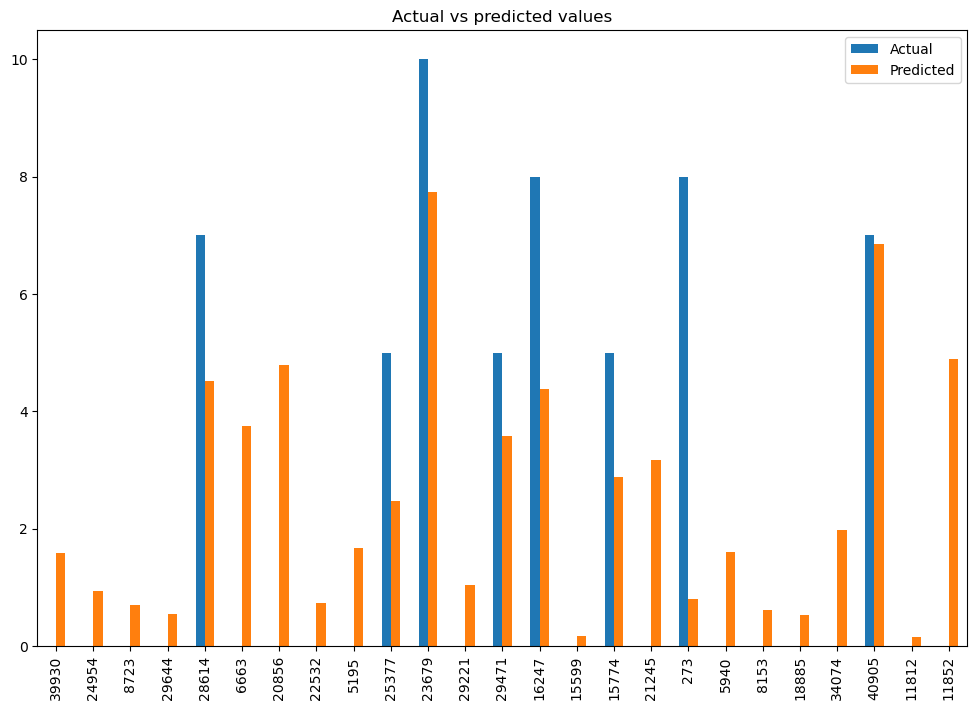

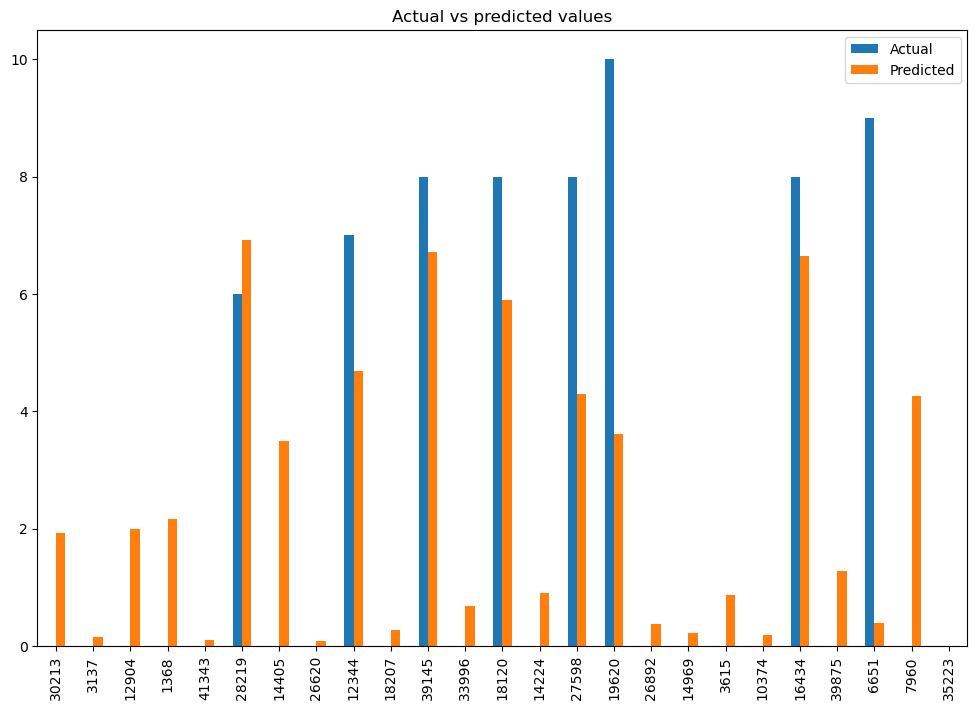

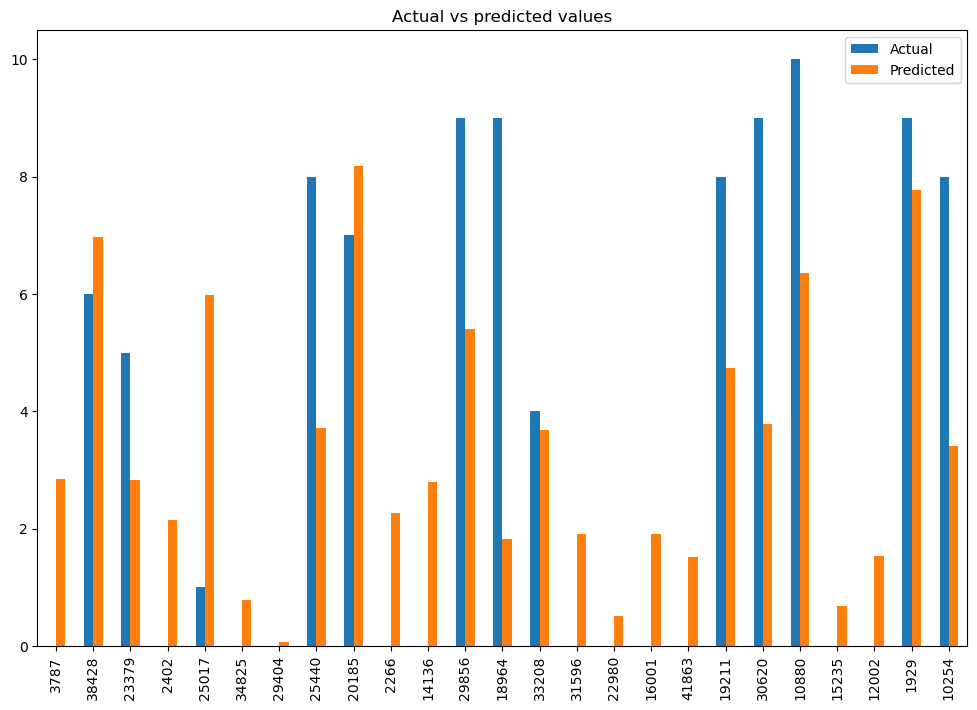

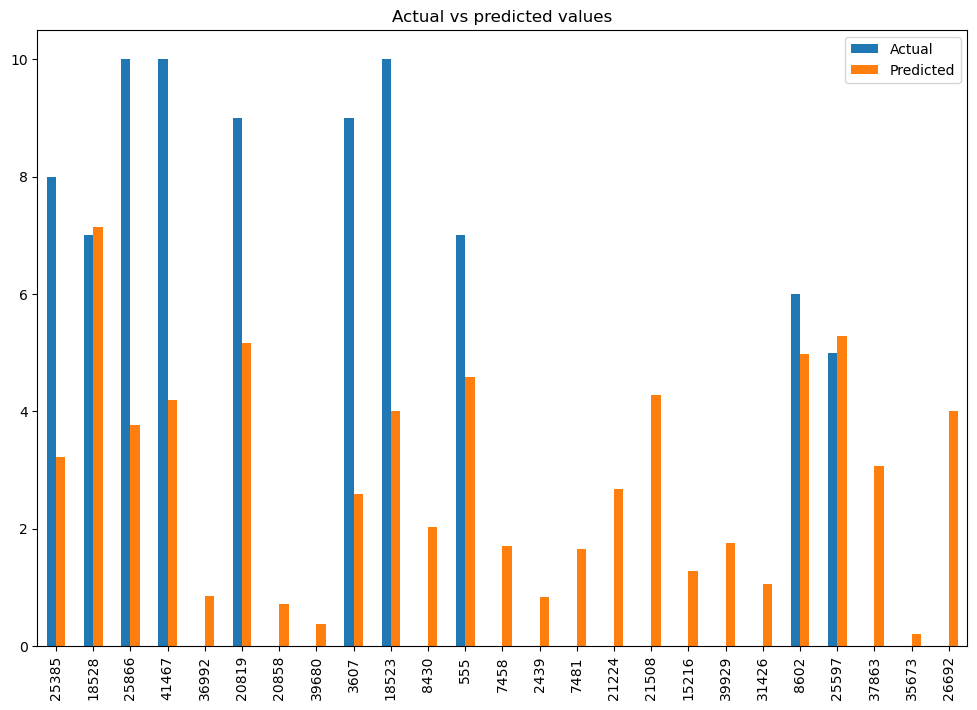

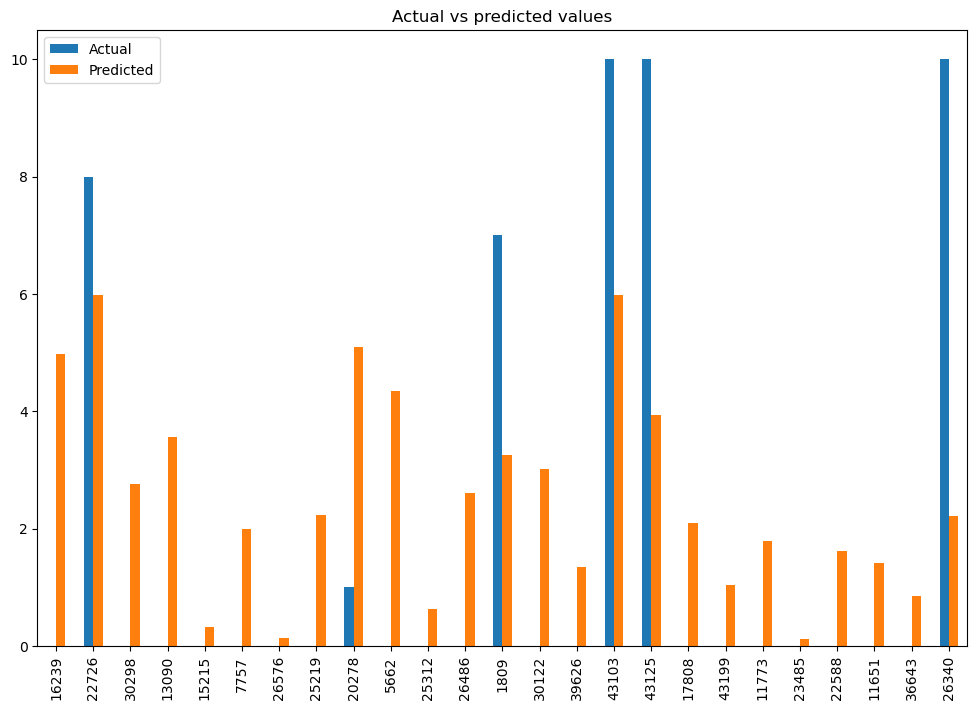

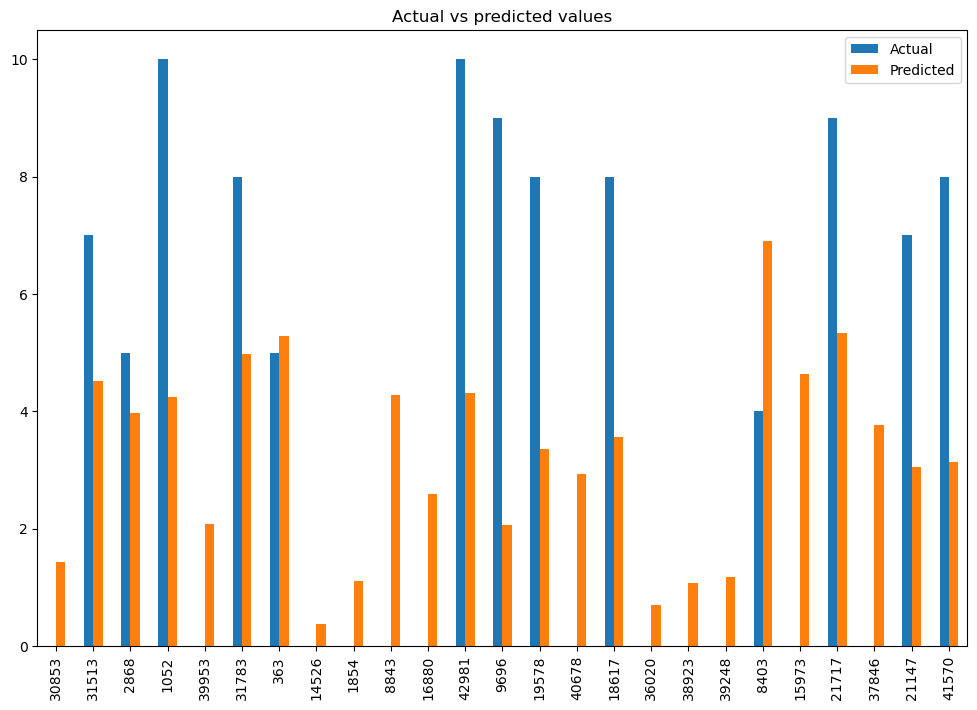

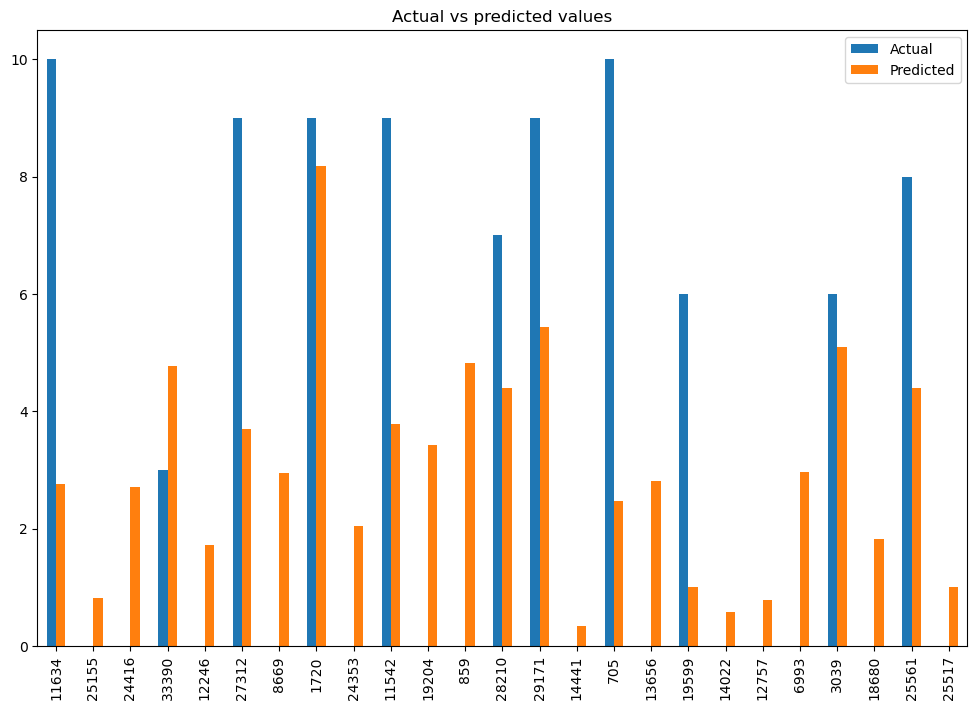

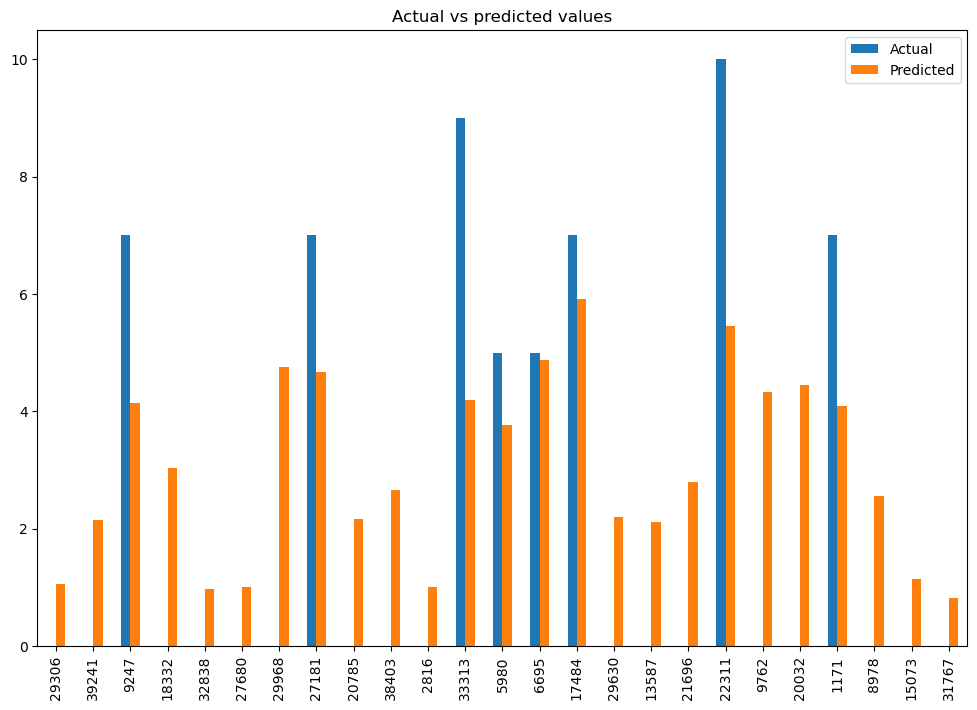

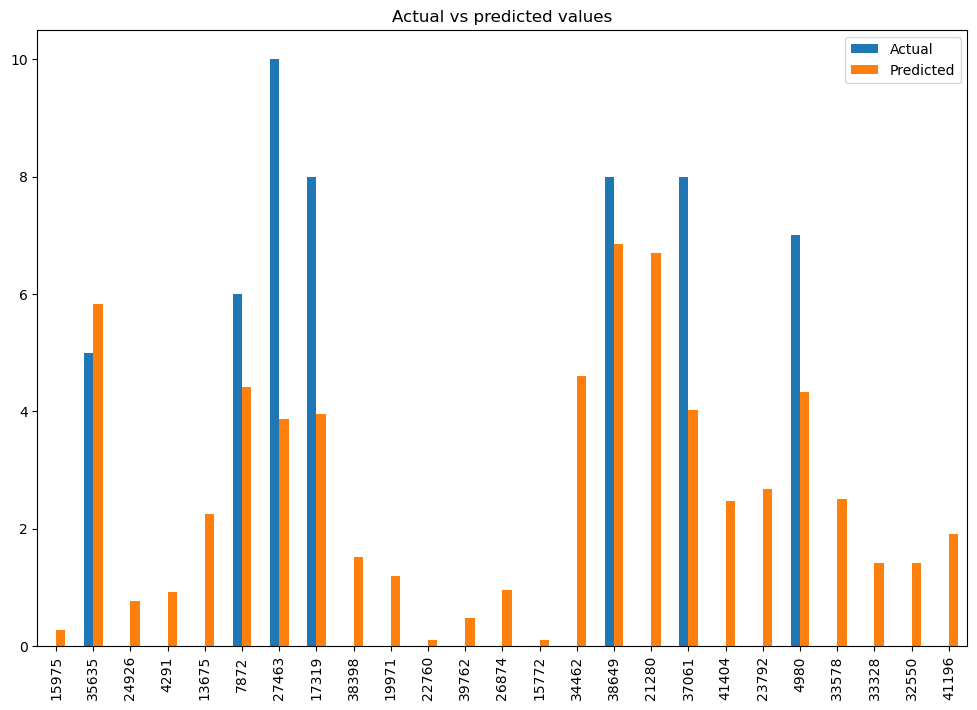

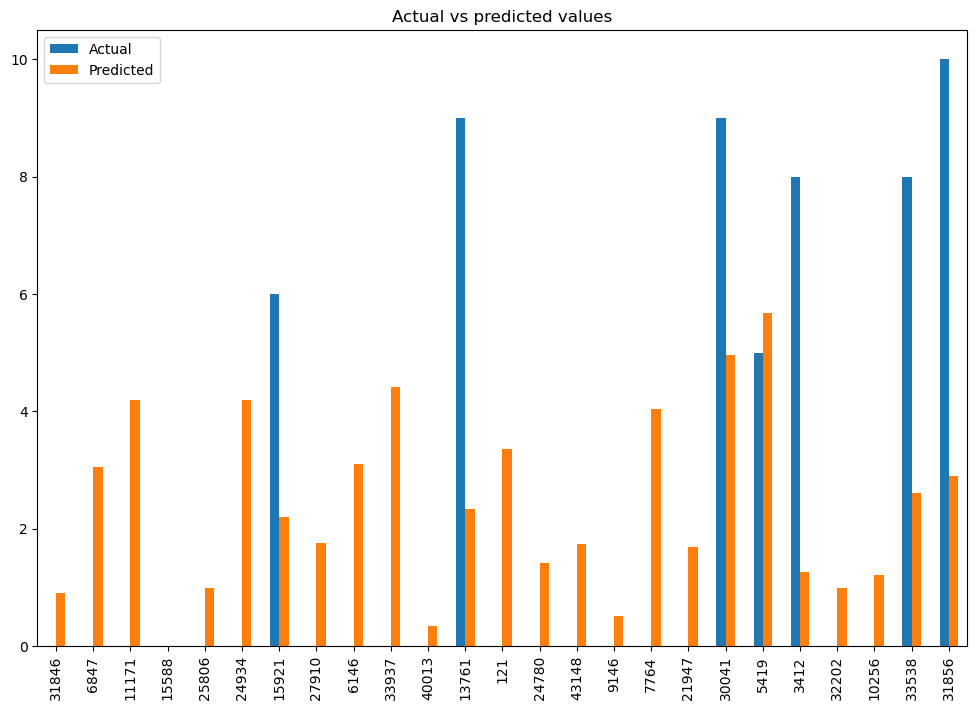

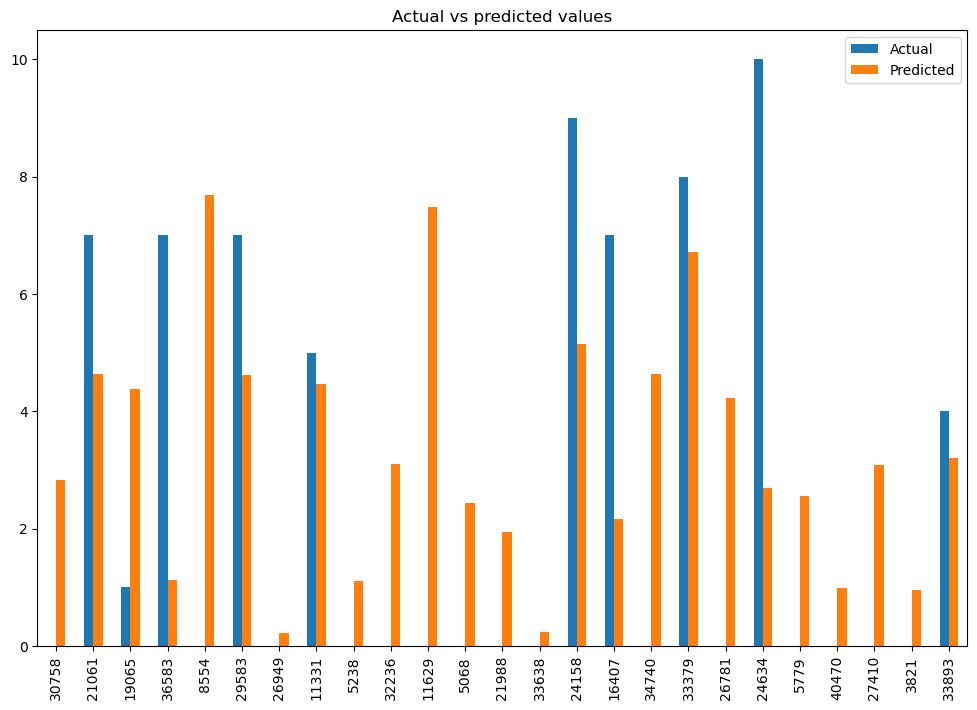

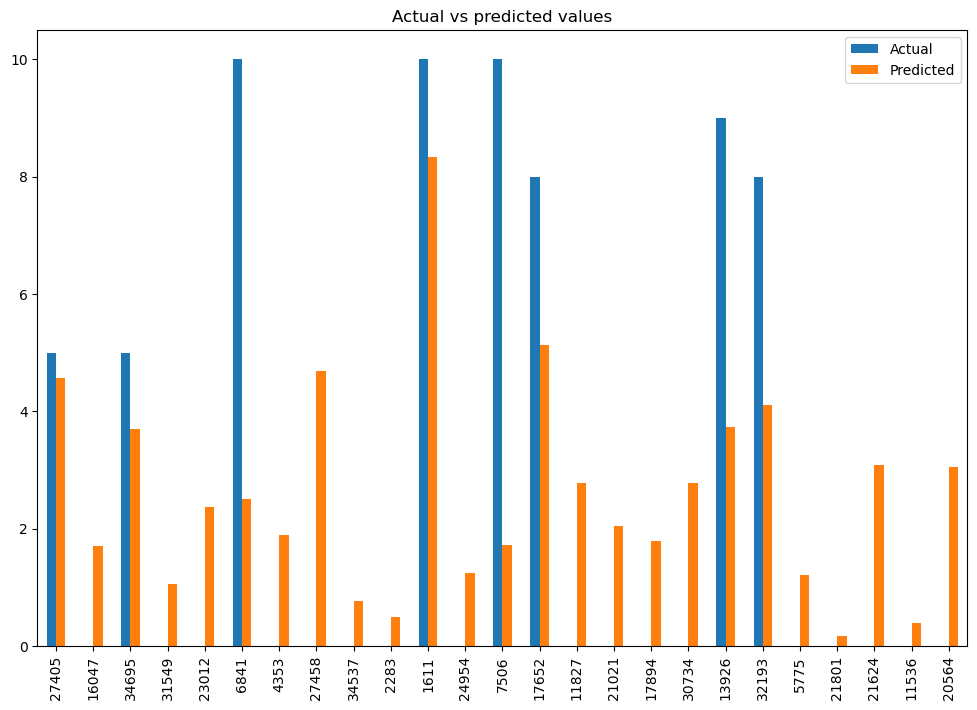

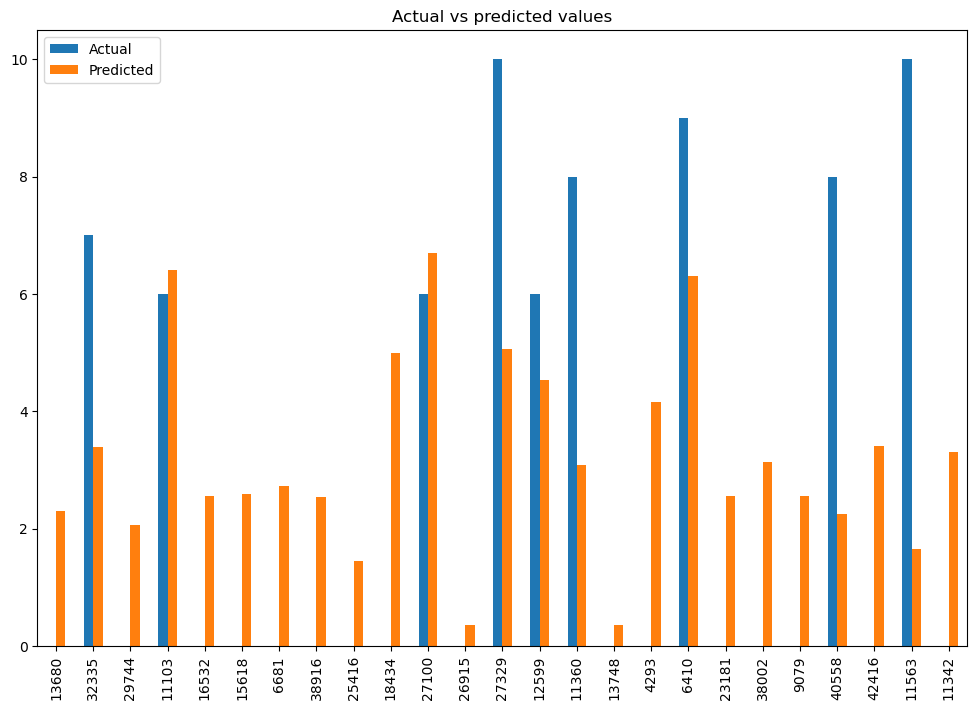

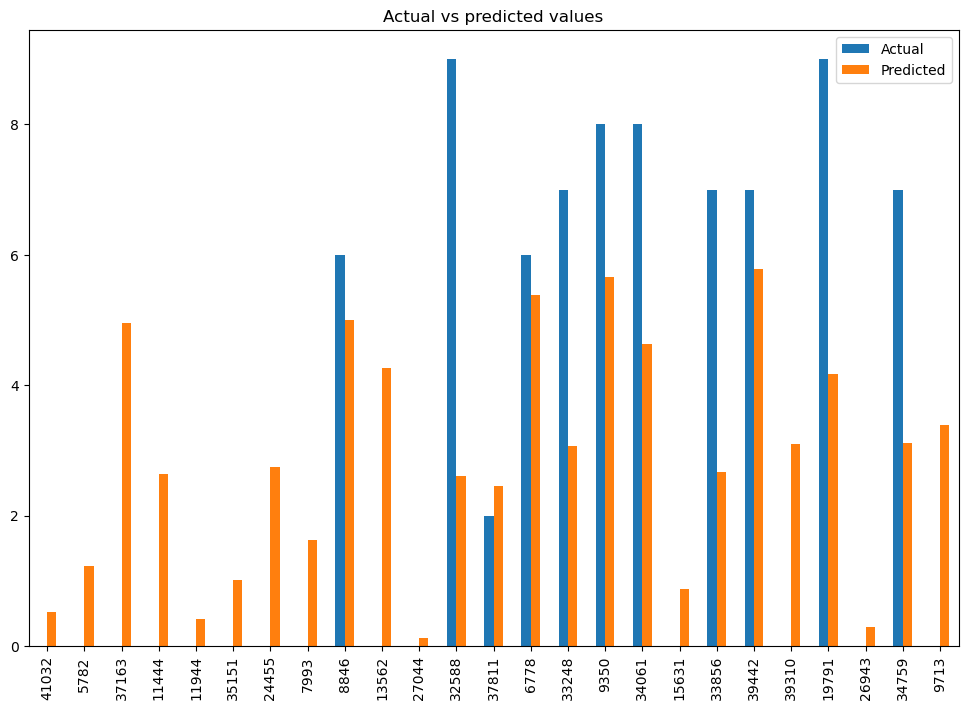

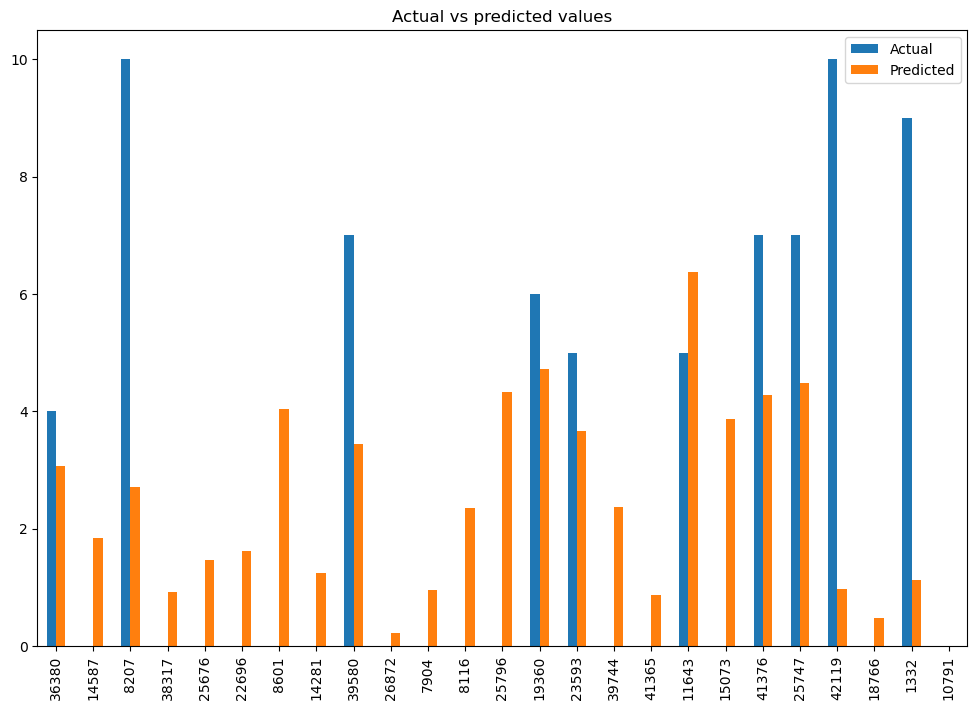

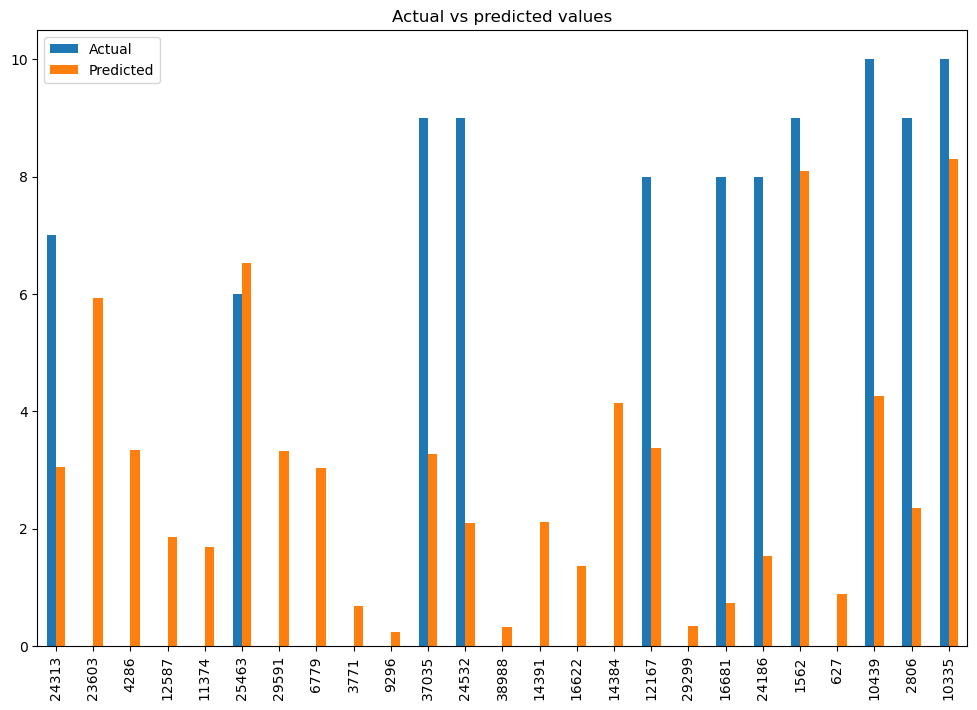

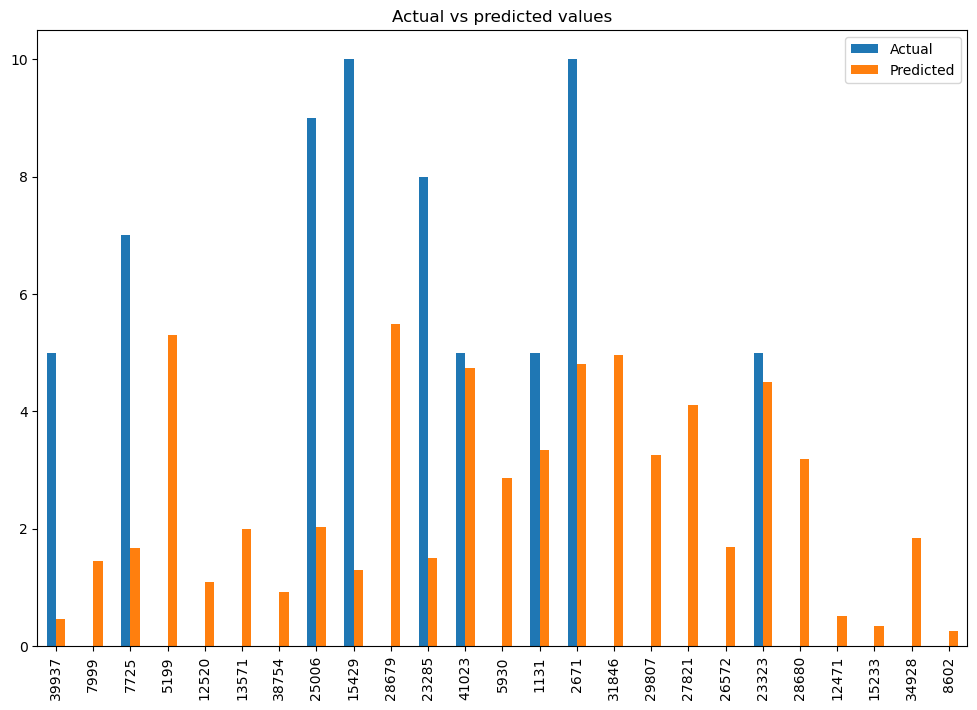

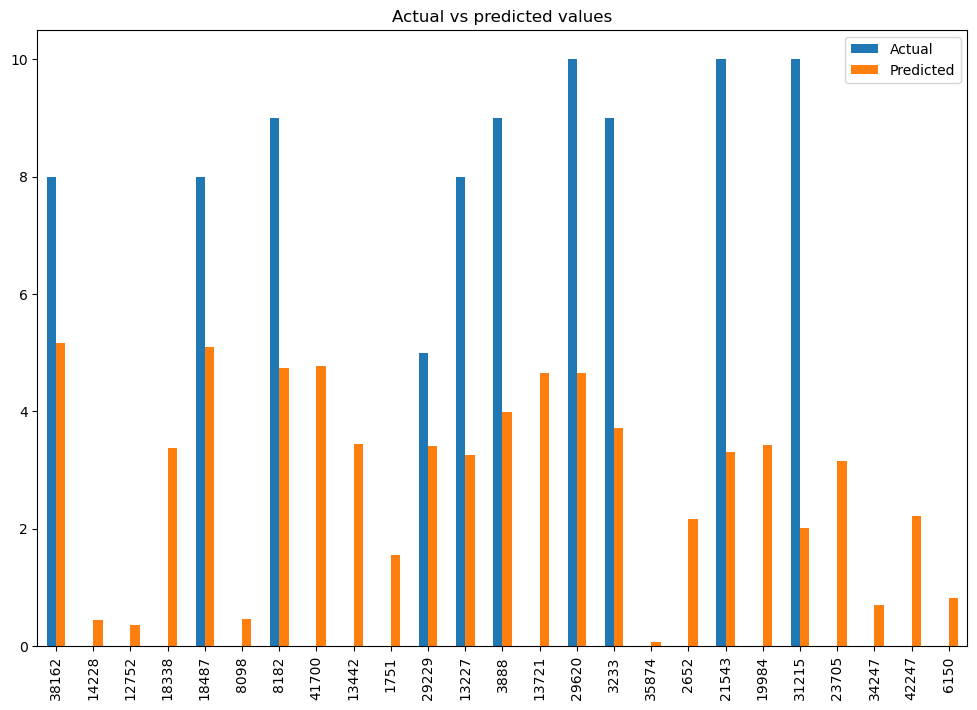

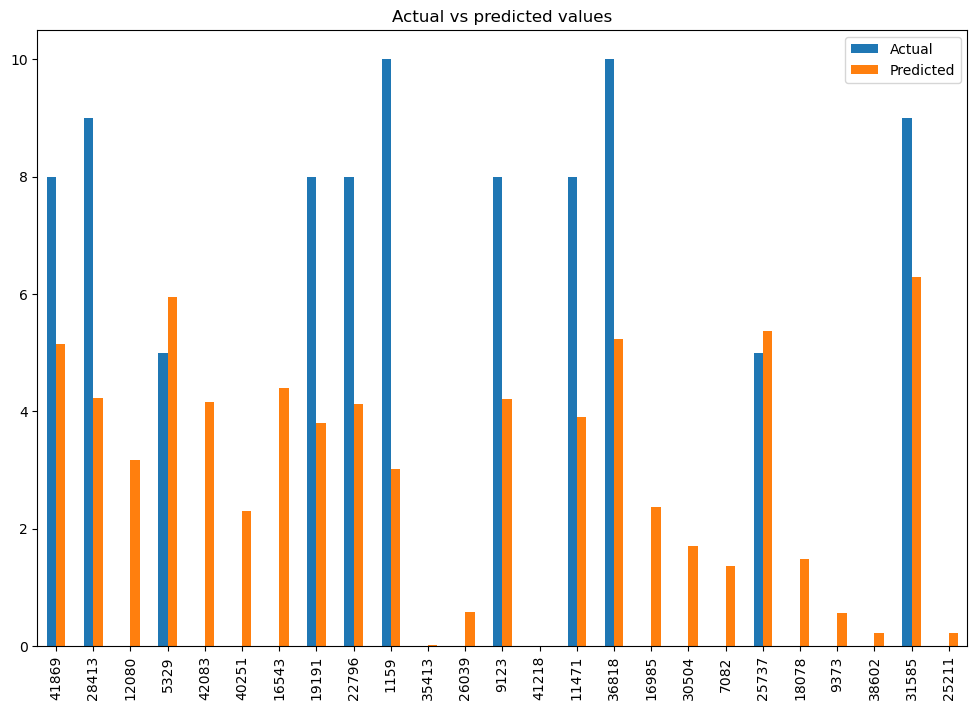

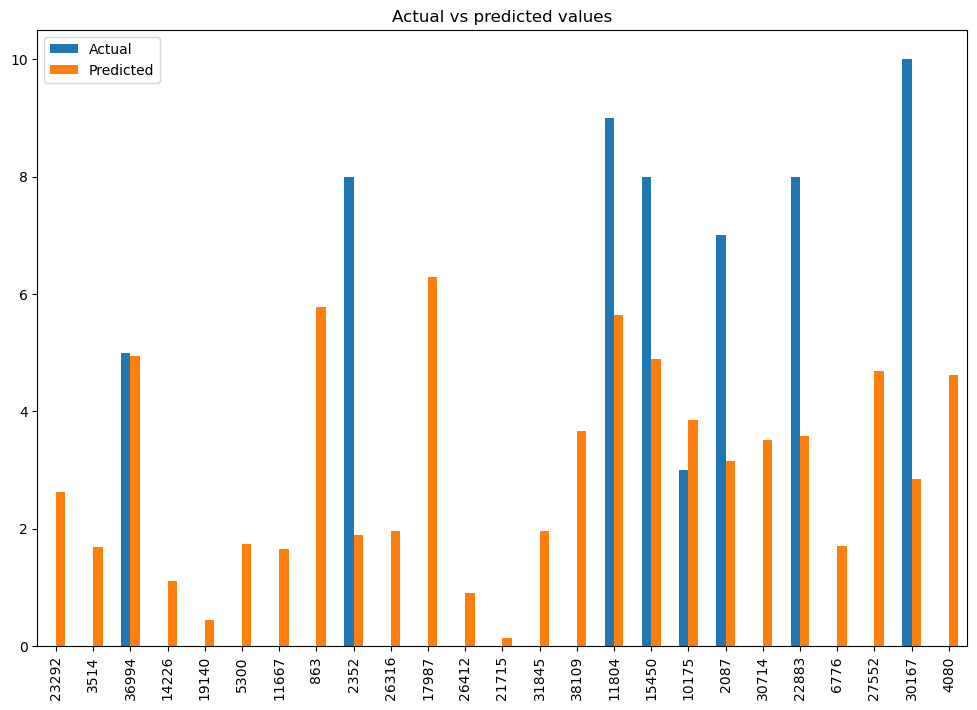

In [30]:
from sklearn.model_selection import KFold, StratifiedKFold

k = 20 # a number of folds 
skfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=113)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from catboost import Pool

y_valid_pred = 0*y_train
y_test_pred = 0

#N_FEATURES = ['User-ID', 'Book-Rating', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'City_st','State_st','N_Country']
N_FEATURES_T = ['User-ID', 'Book-Title', 'Book-Author', 'Publisher', 'City','State','N_Country','Age_gb']
#FEATURE = ['User-ID', 'Book-Title','Book-Author','Publisher', 'City','State','Country','Age_gb']#, 'Topic_num']

for i, (train_index, test_index) in enumerate(skfold.split(X_train, y_train)):    
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    X_train_fold[N_FEATURES_T]= X_train_fold[N_FEATURES_T].astype('int')
    X_valid_fold[N_FEATURES_T]= X_valid_fold[N_FEATURES_T].astype('int')
    
    train_pool = Pool(data=X_train_fold, label=y_train_fold, cat_features=N_FEATURES_T) #.astype('int')
    valid_pool = Pool(data=X_valid_fold, label=y_valid_fold, cat_features=N_FEATURES_T)

    print( "\nFold ", i)
    
    fit_model = model.fit(train_pool, 
                          eval_set=valid_pool,
                          use_best_model=True
                          )
    print( "  N trees = ", model.tree_count_ )
        
    # Generate validation predictions for this fold
    pred = fit_model.predict(X_valid_fold.astype('int'))
    y_valid_pred.iloc[test_index] = pred

    def score_model(model,X_train, X_test, y_train, y_test,
               show_plot=True):   
        y_pred = np.clip(model.predict(X_test.astype('int')),0,10)
        print(f"Test score: {r2_score(y_test, y_pred)}")
        print("MSE: ", mean_squared_error(y_test, y_pred))
        print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    
        predictions_comparision = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()}).sample(25)
        if show_plot == True:
            predictions_comparision.plot(kind="bar", figsize=(12,8),title="Actual vs predicted values")
            print(predictions_comparision.sample(10))    
    
    
        return {
            "test_score_r2" : r2_score(y_test, y_pred),
            "test_score_mse" : mean_squared_error(y_test, y_pred),
            "test_score_rmse" : np.sqrt(mean_squared_error(y_test, y_pred))
            }
    score_model(fit_model, X_train_fold, X_valid_fold, y_train_fold, y_valid_fold, show_plot=True)
    
    # Predict value Clipping
    y_test_pred +=  np.clip(fit_model.predict(x_test[X_valid_fold.columns].astype('int')),0.0,10.0)
    
y_test_pred /= k  # Average test set predictions


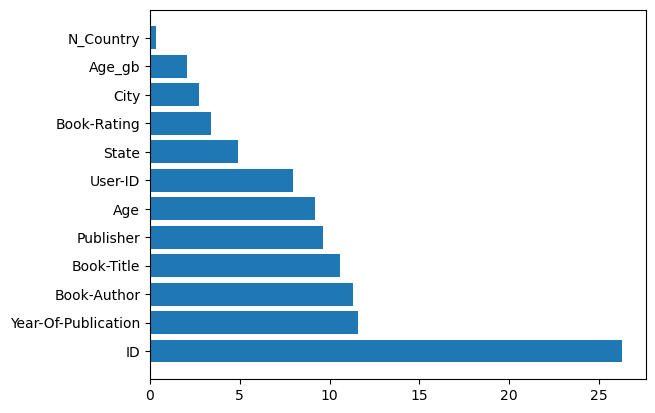

In [33]:
cat_importance_feature = np.argsort(model.feature_importances_)[:-31:-1]
plt.barh(train_lb.columns[cat_importance_feature], model.feature_importances_[cat_importance_feature])
plt.show()


In [34]:
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['Book-Rating'] = y_test_pred
sub

,ID,Book-Rating
0,TEST_000000,5.450444
1,TEST_000001,6.418507
2,TEST_000002,6.055592
3,TEST_000003,5.822753
4,TEST_000004,5.622746
...,...,...
159616,TEST_159616,3.602769
159617,TEST_159617,3.279456
159618,TEST_159618,3.883373
159619,TEST_159619,3.657836


<Axes: xlabel='Book-Rating', ylabel='Count'>

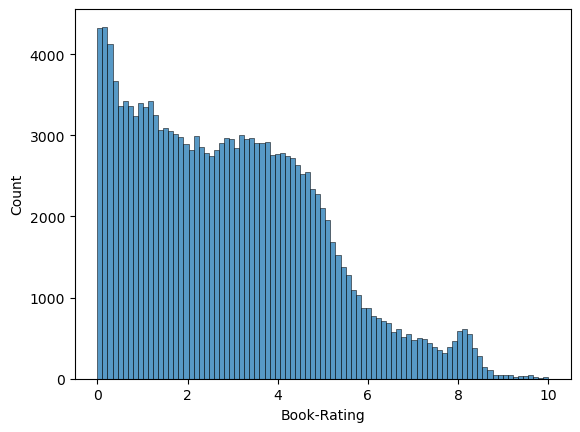

In [35]:
import seaborn as sns
sns.histplot(sub['Book-Rating'])

In [36]:
sub.to_csv('submit_cat+20-folds_preprocessing.csv', index=False,encoding="utf-8-sig")